#hacer introducción de relación matematicas y el NLP
x

# Vectores
Los vectores son arreglos unidimensionales de números en los cuales cada número puede identificarse por sus respectivos índices. Por lo general, se representan como una columna encerrada entre corchetes, como se muestra aquí:$$\mathbf{x} = \begin{bmatrix}
x_1 \\
x_2 \\
x_3 \\
\end{bmatrix}$$


En este ejemplo, el vector
$\mathbf{x}$ tiene tres elementos, y estos elementos almacenan información sobre el vector. Los matemáticos abstraen los vectores como un objeto en el espacio, donde cada elemento del vector representa la proyección de dicho vector a lo largo de un eje dado. Frecuentemente usamos el término
$\mathbb{R}^𝑛$  para definir un vector, donde $\mathbb{R}$ representa el eje real y $𝑛$ denota el número de dimensiones usadas para describir el vector. En general, $\mathbb{R}^n$ es el conjunto de todos los n-tuplas de números reales.

En el ejemplo anterior, el vector
$\mathbf{x}$ está en  $\mathbb{R}^{3}$, lo que significa que se encuentra en un espacio tridimensional y su proyección a lo largo de los tres ejes es $x_1x_2,x_3$. Una vez que un objeto se abstrae como un vector, debe cumplir con todas las propiedades de los vectores y podemos realizar cualquier operación vectorial sobre él.

Por ejemplo, asumamos que tenemos datos de altura y peso de dos personas: la Persona A y la Persona B, la persona  C y la persona D como se muestra en la siguiente tabla:

$$
\begin{array}{|c|c|}
\hline
\textbf{Persona} & \textbf{Peso (kg)} & \textbf{Altura (cm)} \\
\hline
A &60 & 165 \\
B & 70 & 170 \\
C & 80 & 175 \\
D & 90 & 180 \\\\
\hline
\end{array}
$$




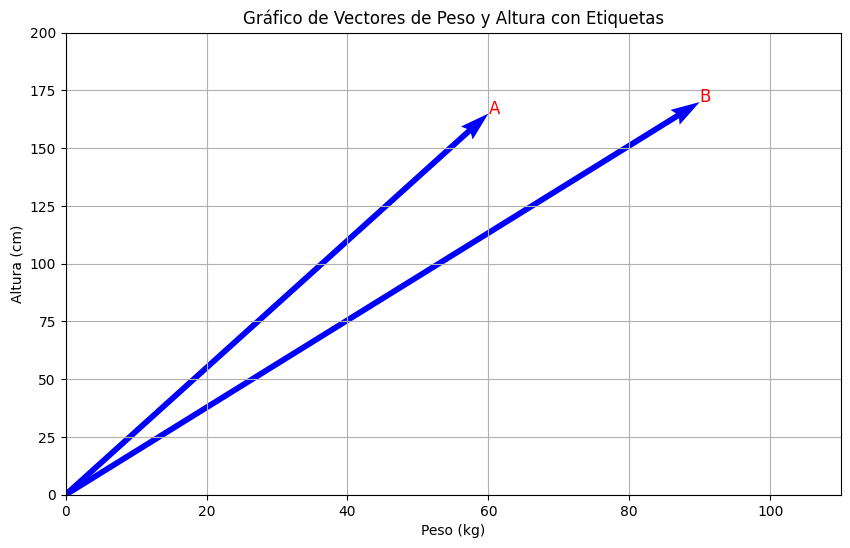

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de peso y altura
peso = np.array([60, 90])
altura = np.array([165, 170])
personas = ['A', 'B']  # Etiquetas para los vectores

# Configuración del gráfico
plt.figure(figsize=(10, 6))
origin = [0, 0]  # Origen de los vectores

# Dibujar los vectores y etiquetarlos
for p, h, label in zip(peso, altura, personas):
    plt.quiver(*origin, p, h, angles='xy', scale_units='xy', scale=1, color='blue')
    plt.text(p, h, label, fontsize=12, color='red')  # Agregar etiqueta cerca del punto final del vector

# Etiquetas y título
plt.xlim(0, 110)
plt.ylim(0, 200)
plt.xlabel('Peso (kg)')
plt.ylabel('Altura (cm)')
plt.title('Gráfico de Vectores de Peso y Altura con Etiquetas')
plt.grid(True)

# Mostrar el gráfico
plt.show()



Si también tuviéramos la temperatura corporal de estas personas, podríamos haberlo abstraído en el espacio $\mathbb{R}^3$, lo que habría requerido una visualización tridimensional.

La vectorización nos permite analizar sujetos utilizando propiedades y operaciones de vectores, como magnitud, similitud, disimilitud, entre otras. Aunque visualizar vectores en un espacio mayor que $\mathbb{R}^3$ no es posible para los seres humanos, todas las propiedades de los vectores son válidas para cualquier espacio dimensional, por lo tanto, no estamos limitados por el número de características de un sujeto dado para transformar los datos en vectores.


Todo esto es excelente, pero ¿cómo nos va a ayudar con el análisis de texto?

Un documento de texto tokenizado podría ser abstraído como un vector en un espacio n-dimensional donde cada dimensión (eje) en el espacio corresponde a un token único de ese documento. La proyección del vector a lo largo de un eje dado (coordenada) sería el conteo de ese token único en el documento de texto. Una vez vectorizado, el documento de texto podría ser analizado junto con otros vectores de documentos de texto, utilizando algebra de vectores.

#Matrcies
Las matrices son una extensión de los arreglos.  Al igual que los vectores, las matrices también se representan utilizando corchetes cuadrados, pero las matrices tienen tanto filas como columnas, como se muestra en la siguiente captura de pantalla:

$$
\mathbf{x}=\begin{bmatrix}
a_{11} & a_{12} \\
a_{21} & a_{22} \\
a_{31} & a_{32} \\
\end{bmatrix}
$$


Una matriz con altura $m$ anchura $n$ se dice que está en $\mathbb{R}^{m \times n}$

  (la matriz anterior pertenece a
$\mathbb{R}^{3 \times 2}$
 ). En el contexto del análisis de texto, las matrices se utilizan con frecuencia para representar y analizar datos de texto. Típicamente, cada vector de documento se representa como una fila de una matriz. En el siguiente ejemplo, hemos leído tres (pequeños) documentos en nuestro sistema y hemos utilizado el módulo CountVectorizer de la biblioteca sklearn para representar estos datos en formato de matriz. El módulo CountVectorizer nos ayuda a vectorizar cada documento y luego combinar cada vector de documento para crear la matriz.

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
X = ("Computers text can analyze text",
 "They do it using vectors and matrices",
 "Computers can process massive amounts of text data")



In [3]:
vectorizer = CountVectorizer(stop_words="english")
X_vectorized = vectorizer.fit_transform(X)
X_vectorized.toarray()

array([[0, 1, 1, 0, 0, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 1, 1],
       [1, 0, 1, 1, 1, 0, 1, 1, 0, 0]])

In [4]:
print(vectorizer.vocabulary_)

{'computers': 2, 'text': 7, 'analyze': 1, 'using': 8, 'vectors': 9, 'matrices': 5, 'process': 6, 'massive': 4, 'amounts': 0, 'data': 3}


In [5]:
print(X_vectorized.todense())

[[0 1 1 0 0 0 0 2 0 0]
 [0 0 0 0 0 1 0 0 1 1]
 [1 0 1 1 1 0 1 1 0 0]]


# Explorando la arquitectura Bag-of-Words (BoW)

Un enfoque muy intuitivo para representar un documento es utilizar la frecuencia de las palabras en ese documento en particular. Esto es precisamente lo que se hace como parte del enfoque BoW.

La longitud de este vector sería igual al tamaño del vocabulario. Cada entrada en el vector correspondería a un término en el vocabulario, y el número en esa entrada particular sería la frecuencia del término en la oración en cuestión. El límite inferior para este número sería 0, lo que indicaría que el término del vocabulario no aparece en la oración considerada.

¿Qué podría ser el límite superior para la entrada en el vector?


Bueno, eso podría ser la frecuencia de aparición de la palabra en el corpus de texto.

Esto indicaría que la palabra que ocurre con mayor frecuencia aparece solo en una oración. Sin embargo, esta es una situación extremadamente rara.









In [6]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import pandas as pd
import re
import numpy as np


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aluca\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aluca\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


1 - Tomar algunas oraciones

In [7]:
sentences = ["We are reading about Natural Language Processing Here",
"Natural Language Processing making computers comprehend language data",
"The field of Natural Language Processing is evolving everyday"]

2 - Crear objeto Pandas

In [8]:
corpus = pd.Series(sentences)
corpus

0    We are reading about Natural Language Processi...
1    Natural Language Processing making computers c...
2    The field of Natural Language Processing is ev...
dtype: object

In [9]:
def text_clean(corpus, keep_list):
    '''
    Purpose : Function to keep only alphabets, digits and certain words (punctuations, qmarks, tabs etc. removed)

    Input : Takes a text corpus, 'corpus' to be cleaned along with a list of words, 'keep_list', which have to be retained
            even after the cleaning process

    Output : Returns the cleaned text corpus

    '''
    cleaned_corpus = pd.Series()
    for row in corpus:
        qs = []
        for word in row.split():
            if word not in keep_list:
                p1 = re.sub(pattern='[^a-zA-Z0-9]',repl=' ',string=word)
                p1 = p1.lower()
                qs.append(p1)
            else : qs.append(word)
        #cleaned_corpus = cleaned_corpus.append(pd.Series(' '.join(qs)))
        cleaned_corpus = pd.concat([cleaned_corpus,pd.Series(' '.join(qs))])
    return cleaned_corpus

def stopwords_removal(corpus):
    wh_words = ['who', 'what', 'when', 'why', 'how', 'which', 'where', 'whom']
    stop = set(stopwords.words('english'))
    for word in wh_words:
        stop.remove(word)
    corpus = [[x for x in x.split() if x not in stop] for x in corpus]
    return corpus

def lemmatize(corpus):
    lem = WordNetLemmatizer()
    corpus = [[lem.lemmatize(x, pos = 'v') for x in x] for x in corpus]
    return corpus

def stem(corpus, stem_type = None):
    if stem_type == 'snowball':
        stemmer = SnowballStemmer(language = 'english')
        corpus = [[stemmer.stem(x) for x in x] for x in corpus]
    else :
        stemmer = PorterStemmer()
        corpus = [[stemmer.stem(x) for x in x] for x in corpus]
    return corpus


def preprocess(corpus, keep_list, cleaning = True, stemming = False, stem_type = None, lemmatization = False, remove_stopwords = True):
    '''
    Purpose : Function to perform all pre-processing tasks (cleaning, stemming, lemmatization, stopwords removal etc.)

    Input :
    'corpus' - Text corpus on which pre-processing tasks will be performed
    'keep_list' - List of words to be retained during cleaning process
    'cleaning', 'stemming', 'lemmatization', 'remove_stopwords' - Boolean variables indicating whether a particular task should
                                                                  be performed or not
    'stem_type' - Choose between Porter stemmer or Snowball(Porter2) stemmer. Default is "None", which corresponds to Porter
                  Stemmer. 'snowball' corresponds to Snowball Stemmer

    Note : Either stemming or lemmatization should be used. There's no benefit of using both of them together

    Output : Returns the processed text corpus

    '''

    if cleaning == True:
        corpus = text_clean(corpus, keep_list)

    if remove_stopwords == True:
        corpus = stopwords_removal(corpus)
    else :
        corpus = [[x for x in x.split()] for x in corpus]

    if lemmatization == True:
        corpus = lemmatize(corpus)


    if stemming == True:
        corpus = stem(corpus, stem_type)

    corpus = [' '.join(x) for x in corpus]

    return corpus

In [10]:

common_dot_words = ['U.S.', 'Mr.', 'Mrs.', 'D.C.']

3 - Preprocesa el corpus utilizando la pipeline anterior:

In [ ]:
preprocessed_corpus = preprocess(corpus, keep_list = common_dot_words, stemming = False, stem_type = None,
                                lemmatization = True, remove_stopwords = True)


In [12]:
preprocessed_corpus

['read natural language process',
 'natural language process make computers comprehend language data',
 'field natural language process evolve everyday']

4 -Construye tu vocabulario, de la siguiente manera

In [13]:
set_of_words = set()
for sentence in preprocessed_corpus:
    print(sentence.split())
    for word in sentence.split():
        set_of_words.add(word)
vocab = list(set_of_words)
print('----------')
print(vocab)

['read', 'natural', 'language', 'process']
['natural', 'language', 'process', 'make', 'computers', 'comprehend', 'language', 'data']
['field', 'natural', 'language', 'process', 'evolve', 'everyday']
----------
['process', 'make', 'computers', 'field', 'evolve', 'comprehend', 'everyday', 'language', 'data', 'read', 'natural']


In [14]:
print(len(vocab))

11


In [15]:
set_of_words

{'comprehend',
 'computers',
 'data',
 'everyday',
 'evolve',
 'field',
 'language',
 'make',
 'natural',
 'process',
 'read'}

5 - Obtén la posición/índice de cada token en el vocabulario, de la siguiente manera

In [16]:
position = {}
for i, token in enumerate(vocab):
    position[token] = i
print(position)

{'process': 0, 'make': 1, 'computers': 2, 'field': 3, 'evolve': 4, 'comprehend': 5, 'everyday': 6, 'language': 7, 'data': 8, 'read': 9, 'natural': 10}


6 - Crea una matriz de marcador de posición para almacenar el BoW. Atención: la forma de la matriz es (número de oraciones * longitud del vocabulario)


In [17]:
# contiene la cantidad de palabras del corpus y la cantidad de oraciones de vocan
bow_matrix = np.zeros((len(preprocessed_corpus), len(vocab)))
bow_matrix


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [18]:
bow_matrix

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

7 - Incrementa en 1 el índice posicional de cada palabra si aparece en una oración, como se ilustra en el siguiente fragmento de código

In [19]:
for i, preprocessed_sentence in enumerate(preprocessed_corpus):
    for token in preprocessed_sentence.split():
        bow_matrix[i, position[token]] += 1

 Let's see the final BoW

In [20]:
bow_matrix

array([[1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1.],
       [1., 1., 1., 0., 0., 1., 0., 2., 1., 0., 1.],
       [1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1.]])

In [21]:
#cantidad de dimensiones de la matriz
bow_matrix.shape

(3, 11)

 La columna 11 en la matriz BoW tiene 1, 2 y 1 respectivamente, lo que refleja el hecho de que el token de Language apareció una vez, dos veces y nuevamente una vez en las oraciones 1, 2 y 3, respectivamente. Puedes sacar conclusiones similares a partir de la matriz. Aquí solo tomamos en cuenta unigrams. Esto se puede ampliar fácilmente a bigrams, trigrams y otros n-grams.

## Entendiendo un CountVectorizer básico
CountVectorizer es una herramienta proporcionada por la biblioteca sklearn o scikit-learn en Python que automatiza todo el esfuerzo descrito anteriormente y ofrece interfaces de programación de aplicaciones (APIs) que facilitan la construcción de un modelo BoW (Bolsa de Palabras).
Convierte una lista de documentos de texto en una matriz donde cada entrada de la matriz corresponde al conteo de un token específico en las oraciones respectivas.

In [22]:
vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform(preprocessed_corpus)

Los resultados en el corpus preprocesado son los siguientes.
Como se muestra en el siguiente fragmento de código, los resultados son los mismos que se obtuvieron para el modelo BoW discutido en la sección anterior:

In [23]:
print(vectorizer.get_feature_names_out())
print(bow_matrix.toarray())

['comprehend' 'computers' 'data' 'everyday' 'evolve' 'field' 'language'
 'make' 'natural' 'process' 'read']
[[0 0 0 0 0 0 1 0 1 1 1]
 [1 1 1 0 0 0 2 1 1 1 0]
 [0 0 0 1 1 1 1 0 1 1 0]]


In [24]:
preprocessed_corpus

['read natural language process',
 'natural language process make computers comprehend language data',
 'field natural language process evolve everyday']

Por lo tanto, podemos concluir que esta sencilla solución resulta increíblemente útil para ahorrar esfuerzos.

##Características predeterminadas ofrecidas por CountVectorizer
Exploremos algunas características esenciales que el módulo CountVectorizer ofrece de manera predeterminada, eliminando la necesidad de escribir código personalizado.

#Diccionario predefinido y soporte para n-grams

CountVectorizer brinda gran flexibilidad al permitir el uso de un diccionario predefinido de palabras en lugar de crear uno basado en los datos. También incluye opciones para tokenizar texto y eliminar stopwords.

Anteriormente   construimoes un modelo BoW utilizando bigramas y trigramas. El módulo CountVectorizer permite lograr esto sin necesidad de escribir código explícito, utilizando un atributo llamado ngram_range. Veamos un ejemplo en el siguiente bloque de código:

In [25]:
position

{'process': 0,
 'make': 1,
 'computers': 2,
 'field': 3,
 'evolve': 4,
 'comprehend': 5,
 'everyday': 6,
 'language': 7,
 'data': 8,
 'read': 9,
 'natural': 10}

In [26]:
vectorizer_ngram_range = CountVectorizer(analyzer='word', ngram_range=(3, 3))
bow_matrix_ngram = vectorizer_ngram_range.fit_transform(preprocessed_corpus)
print(vectorizer_ngram_range.get_feature_names_out())
print(bow_matrix_ngram.toarray())


['comprehend language data' 'computers comprehend language'
 'field natural language' 'language process evolve'
 'language process make' 'make computers comprehend'
 'natural language process' 'process evolve everyday'
 'process make computers' 'read natural language']
[[0 0 0 0 0 0 1 0 0 1]
 [1 1 0 0 1 1 1 0 1 0]
 [0 0 1 1 0 0 1 1 0 0]]


In [27]:
df = pd.DataFrame(bow_matrix_ngram.toarray(), columns=vectorizer_ngram_range.get_feature_names_out())
df

,comprehend language data,computers comprehend language,field natural language,language process evolve,language process make,make computers comprehend,natural language process,process evolve everyday,process make computers,read natural language
0,0,0,0,0,0,0,1,0,0,1
1,1,1,0,0,1,1,1,0,1,0
2,0,0,1,1,0,0,1,1,0,0


Como se puede observar  se modifica el parámetro ngram_range para incluir unigramas, bigramas y trigramas.
Si observa detenidamente, la novena frase desde el final es el trigram natural language process, y aparece una vez en cada oración. En consecuencia, la columna correspondiente a dicho trigram contiene los valores 1, 1 y 1, tal como era de esperarse.

# max_features
Es extremadamente importante tener en cuenta, al construir un modelo BoW, que el vocabulario no crezca de manera descontrolada y se vuelva excesivamente grande. Esto se debe a que un vocabulario demasiado amplio incrementaría considerablemente la dimensionalidad del modelo, y una alta dimensionalidad no necesariamente se traduce en un mejor modelo. De hecho, puede perjudicar la capacidad de inferencia del modelo.

Este fenómeno se conoce como la maldición de la dimensionalidad y podría llevar a una condición llamada sobreajuste.

La funcionalidad de CountVectorizer ofrece un parámetro llamado max_features, que permite construir un vocabulario cuyo tamaño será menor o igual a max_features, ordenado según la frecuencia de aparición de los tokens en un corpus.

In [28]:
Vectorizer_max_features = CountVectorizer(analyzer='word', max_features=6, ngram_range=(1, 3))
bow_matrix_max_features = Vectorizer_max_features.fit_transform(preprocessed_corpus)
print(Vectorizer_max_features.get_feature_names_out())
print(bow_matrix_max_features.toarray())

['language' 'language process' 'natural' 'natural language'
 'natural language process' 'process']
[[1 1 1 1 1 1]
 [2 1 1 1 1 1]
 [1 1 1 1 1 1]]


In [29]:
df_ = pd.DataFrame(bow_matrix_max_features.toarray(), columns=Vectorizer_max_features.get_feature_names_out())
df_

,language,language process,natural,natural language,natural language process,process
0,1,1,1,1,1,1
1,2,1,1,1,1,1
2,1,1,1,1,1,1


## Umbrales Min_df y Max_df
Ahora que entendemos cómo max_features ayuda a limitar el tamaño del vocabulario, también debemos comprender que, en la parte superior de este vocabulario limitado, se encontrarán términos o frases que han ocurrido con mucha frecuencia en el corpus de texto en cuestión. Estas frases pueden aparecer con mucha frecuencia en un documento individual o estar presentes en casi todos los documentos del corpus, y es posible que no aporten ningún patrón significativo.

Un enfoque que hemos discutido hasta ahora para eliminar estos términos es la eliminación de stopwords. Sin embargo, otra técnica conveniente que ofrece CountVectorizer es el parámetro max_df, que ignora los términos cuya frecuencia de documentos sea mayor que un umbral especificado en max_df.

De manera similar, podemos eliminar términos que ocurren rara vez en un documento, es decir, menos veces que un umbral dado, utilizando el parámetro min_df. Sin embargo, esta técnica podría presentar problemas, ya que los términos poco frecuentes podrían ser muy relevantes para ciertos documentos dentro del corpus.

In [30]:
vectorizer_max_feature = CountVectorizer(analyzer='word', max_features=6, ngram_range=(1, 3), min_df=2, max_df=3)
bow_matrix_max_feature = vectorizer_max_feature.fit_transform(preprocessed_corpus)
print(vectorizer_max_feature.get_feature_names_out())
print(bow_matrix_max_feature.toarray())


['language' 'language process' 'natural' 'natural language'
 'natural language process' 'process']
[[1 1 1 1 1 1]
 [2 1 1 1 1 1]
 [1 1 1 1 1 1]]


#Limitaciones de la representación BoW
El modelo BoW ofrece un mecanismo para representar datos de texto mediante números. Sin embargo, presenta ciertas limitaciones:

**1- Dependencia del conteo de términos:**
El modelo se basa únicamente en el conteo de términos dentro de un documento. Si bien esto puede funcionar bien para tareas o casos de uso con un vocabulario limitado, no escala de manera eficiente para vocabularios amplios.

**2- Reducción de la importancia de términos poco frecuentes:**
BoW tiende a minimizar o eliminar la relevancia de tokens o frases que ocurren con muy poca frecuencia. Aunque estos términos aparezcan en un número reducido de documentos, podrían ser cruciales para la representación de dichos documentos. El modelo no admite formas de considerar esta relevancia.

**3- Falta de semántica y contexto:**
El modelo no toma en cuenta los significados o la semántica asociados con los tokens o frases en un documento. Ignora la posibilidad de capturar características relacionadas con el vecindario de una frase, lo que podría proporcionar pistas sobre el contexto en el que se usa una palabra o frase. Por ende, BoW omite completamente el contexto.

**4- Crecimiento del vocabulario en corpus extensos:**
En corpus de texto grandes, el modelo puede generar vocabularios extremadamente amplios. Esto resulta en vectores de gran tamaño para representar cada documento, lo que podría deteriorar el rendimiento del modelo.

# Vectores TF-IDF

Anteriormente vimos que la frecuencia de palabras dentro de un documento era el único indicador utilizado para construir los vectores de los documentos. Las palabras que aparecen rara vez son eliminadas o tienen pesos demasiado bajos en comparación con aquellas que ocurren con mucha frecuencia.

Al seguir este enfoque, se pierde el patrón de información que pueden aportar términos poco comunes pero que son altamente informativos para un documento o que reflejan un patrón evidente en documentos similares.

La metodología TF-IDF (Term Frequency-Inverse Document Frequency) para asignar pesos a los términos en un corpus de texto ayuda a mitigar este problema

## El enfoque TF-IDF

El enfoque TF-IDF es, con diferencia, el más utilizado para asignar pesos a los términos. Se encuentra en aplicaciones como motores de búsqueda, sistemas de recuperación de información y minería de texto, entre otros.

TF-IDF también es un método basado en la ocurrencia para vectorizar texto y extraer características de este. Es un compuesto de dos términos, descritos de la siguiente manera:

**TF (Frecuencia de Término):**
Es similar a la herramienta CountVectorizer. Considera con qué frecuencia aparece un término en un documento. Dado que la mayoría de los documentos en un corpus de texto tienen diferentes longitudes, es muy probable que un término aparezca con mayor frecuencia en documentos más largos que en los más cortos.
Por esta razón, es necesario normalizar la frecuencia del término dividiéndola entre el conteo total de términos en el documento. Existen múltiples variaciones para calcular TF, pero la representación más común es la siguiente:

$$
TF(w) = \frac{\text{Número de veces que la palabra } w \text{ aparece en el documento}}{\text{Total de palabras en el documento}}
$$


### ARREGLAR LA FORMULA

## IDF (Frecuencia Inversa de Documentos)
El IDF hace justicia a los términos que no aparecen con mucha frecuencia en los documentos, pero que podrían ser más significativos para representar el documento. Mide la importancia de un término dentro de un documento.

El uso exclusivo de TF otorgaría más peso a los términos que aparecen con mucha frecuencia. En cambio, con IDF ocurre lo contrario: se suprimen los pesos de los términos frecuentes y se aumentan los pesos de aquellos menos frecuentes pero potencialmente más significativos.

Al igual que con TF, existen varias maneras de calcular IDF, pero la representación más común es la siguiente:

$$
IDF(w) = log\frac{\text{Número de documentos}}{\text{Numero de documentos que contienen la palabra}
$$

Como puedes observar, el peso de la palabra $w$ en el documento $d$ se calcula mediante el siguiente peso de TF-IDF:

$$weight = TF(w,d)\times IDF(w)$$

Como se puede observar, el $weight$ de la palabra $w$ en el documento $d$ es el producto del $TF$ de la palabra $w$ en el documento $d$ y el $IDF$ de la palabra $w$ en el corpus de texto.

Ahora veamos cómo se aplica todo esto en la práctica. Para este ejemplo, utilizaremos el mismo corpus que se empleó para el modelo CountVectorizer, con el fin de observar las diferencias. Además, los datos también pasaron por la misma etapa de preprocesamiento

##Construcción de un vectorizador básico de TF-IDF






In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [32]:
vectorizer = TfidfVectorizer()
bow_matrix_x = vectorizer.fit_transform(preprocessed_corpus)
print(vectorizer.get_feature_names_out())
print(bow_matrix.toarray())



['comprehend' 'computers' 'data' 'everyday' 'evolve' 'field' 'language'
 'make' 'natural' 'process' 'read']
[[0 0 0 0 0 0 1 0 1 1 1]
 [1 1 1 0 0 0 2 1 1 1 0]
 [0 0 0 1 1 1 1 0 1 1 0]]


In [33]:
bow_matrix.shape

(3, 11)

In [34]:
preprocessed_corpus

['read natural language process',
 'natural language process make computers comprehend language data',
 'field natural language process evolve everyday']

In [35]:
df_tfidf = pd.DataFrame(bow_matrix.toarray(), columns=vectorizer.get_feature_names_out())
df_tfidf

,comprehend,computers,data,everyday,evolve,field,language,make,natural,process,read
0,0,0,0,0,0,0,1,0,1,1,1
1,1,1,1,0,0,0,2,1,1,1,0
2,0,0,0,1,1,1,1,0,1,1,0


 la tercera columna desde el final corresponde al término natural. Este término aparece una vez en cada documento; sin embargo, el peso de TF-IDF para este término es diferente entre los documentos. Esto se debe a que, aunque el IDF permanecerá igual para natural en todos los documentos, el TF variará debido a que el tamaño de cada documento es diferente, y el componente TF se normaliza en función de eso.

Otra razón para esta diferencia es que cada fila o vector se normaliza para tener una norma unitaria, es decir, la longitud del vector es igual a 1.

## N-gramas y características máximas en el vectorizador TF-IDF
De manera similar a CountVectorizer, el vectorizador TF-IDF ofrece la capacidad de utilizar n-gramas y max_features para limitar el vocabulario.

In [36]:
vectorizer_n_gram_max_features = TfidfVectorizer(ngram_range=(1, 3), analyzer='word',max_features=6)
bow_matrix = vectorizer_n_gram_max_features.fit_transform(preprocessed_corpus)
print(vectorizer_n_gram_max_features.get_feature_names_out())
print(bow_matrix.toarray())


['language' 'language process' 'natural' 'natural language'
 'natural language process' 'process']
[[0.40824829 0.40824829 0.40824829 0.40824829 0.40824829 0.40824829]
 [0.66666667 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333]
 [0.40824829 0.40824829 0.40824829 0.40824829 0.40824829 0.40824829]]


## Limitaciones de la representación del vectorizador TF-IDF
El vectorizador TF-IDF ofrece una mejora sobre CountVectorizer al escalar los pesos de los términos menos frecuentes y al utilizar el componente IDF. También es computacionalmente rápido. Sin embargo, aún depende del análisis léxico y no tiene en cuenta aspectos como la co-ocurrencia de términos, la semántica, el contexto asociado a los términos y la posición de un término dentro de un documento. Al igual que CountVectorizer, depende del tamaño del vocabulario, por lo que se vuelve realmente lento cuando se manejan grandes tamaños de vocabulario

## Cálculo de distancia/similitud entre vectores de documentos
Hemos visto dos métodos para construir vectores que representan documentos de texto. La siguiente pregunta que surge es:

¿Cómo medir la similitud o disimilitud entre documentos de texto y cómo se pueden aprovechar los vectores construidos hasta ahora para encontrar una solución a este problema?

Si las palabras utilizadas en dos documentos son similares, esto indica que los documentos también son similares.

## Similitud del Coseno
La similitud del Coseno proporciona información sobre el ángulo entre dos vectores. Dos vectores serán similares si están bastante cerca en términos de dirección y magnitud.

La similitud del coseno ayuda a medir el coseno de los ángulos entre dos vectores. El valor de la similitud del coseno estará en el rango de -1 a +1. El valor +1 indica que los vectores son perfectamente similares, y el valor -1 indica que los vectores son perfectamente disímiles o exactamente opuestos entre sí. Como puedes deducir, dos documentos son similares si sus valores de similitud coseno están cerca de +1. Además, estas medidas de similitud siempre se calculan entre pares de documentos. La similitud coseno solo puede calcularse para vectores del mismo tamaño. La fórmula para la similitud coseno entre dos vectores A y B es la siguiente:

$$cos(\theta)= \frac{AB}{||A||||B||}$$

Ejemplo: Calcular el coseno del angulo de los vectores
$d1 = (5, 0, 3, 0, 2, 0, 0, 2, 0, 0)$ y  $d2 = (3, 0, 2, 0, 1, 1,0, 1, 0, 1)$

In [37]:
# distacion coseno dado deos vectores
v1 = np.array([5, 0, 3, 0, 2, 0, 0, 2, 0, 0])
v2 = np.array([3, 0, 2, 0, 1, 1,0, 1, 0, 1])

# producto punto de un vector
dot_product = np.dot(v1, v2)
print(dot_product)

# calcular norma de un vector
norm_v1 = np.linalg.norm(v1)
norm_v2 = np.linalg.norm(v2)
print(norm_v1)
print(norm_v2)

# producto punto entre las normas de los dos vectores

cos_theta = dot_product / (norm_v1 * norm_v2)
print(cos_theta)

25
6.48074069840786
4.123105625617661
0.9356014857063997


In [38]:
def cosine_similarity(vector1, vector2):
    dot_product = np.dot(vector1, vector2)
    norm_vector1 = np.linalg.norm(vector1)
    norm_vector2 = np.linalg.norm(vector2)
    return dot_product / (norm_vector1 * norm_vector2)



In [39]:
cosine_similarity(v1, v2)

np.float64(0.9356014857063997)

## Similitud coseno en vectores desarrollados con CountVectorizer
Usaremos bow_matrix, obtenida en la sección de CountVectorizer, para calcular las distancias entre los documentos. El siguiente fragmento de código nos ayudará a hacerlo:

In [40]:
# importar cosine similarity
from sklearn.metrics.pairwise import cosine_similarity

In [41]:
#print(bow_matrix.toarray())

#calcular la similitud coseno en la matriz
cosine_similarity_matrix = cosine_similarity(bow_matrix_x)
print(cosine_similarity_matrix)

#presentar el resultado en un dataframe
df_cosine_similarity = pd.DataFrame(cosine_similarity_matrix)
df_cosine_similarity

[[1.         0.39514116 0.36365456]
 [0.39514116 1.         0.28100719]
 [0.36365456 0.28100719 1.        ]]


,0,1,2
0,1.000000,0.395141,0.363655
1,0.395141,1.000000,0.281007
2,0.363655,0.281007,1.000000


# Similitud coseno en vectores desarrollados con la herramienta TfIdfVectorizer
Utilizamos la matriz tf-idf y calculamos las distancias entre los documentos en función de ella, de la siguiente manera: